# Machine Learning LAB 3
# IMAGE CLASSIFICATION WITH NEURAL NETWORKS
Course 2022/23: P. Zanuttigh, F. Barbato, M. Mel

The notebook contains some simple tasks to be performed with **NEURAL NETWORKS (NNs)**. <br>
Complete all the **required code sections** and **answer to all the questions**. <br>

### IMPORTANT for the evaluation score:
1. **Read carefully all cells** and **follow the instructions**
2. **Re-run all the code from the beginning** to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebooks.
3. Make sure to fill the code in the appropriate places **without modifying the template**, otherwise you risk breaking later cells.
4. Please **submit the jupyter notebook file (.ipynb)**, do not submit python scripts (.py) or plain text files. **Make sure that it runs fine with the restat&run all command**.
5. **Answer the questions in the appropriate cells**, not in the ones where the question is presented.

# Clothes Classification with Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use [**Fashion MNIST**](https://github.com/zalandoresearch/fashion-mnist), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
# load the required packages and check Scikit-learn version
%matplotlib inline  

import numpy as np
from matplotlib import pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from pandas import DataFrame

from sklearnex import patch_sklearn # if you have an Intel CPU and have installed the Intel MKL 
patch_sklearn()                     # library you can uncomment these lines for a speedup

scikit-learn version:  1.0.2


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

Place your **name** and **ID number** (matricola) in the cell below. <br>
Also recall to **save the file as Surname_Name_LAB3.ipynb**

**Student name**: Francesco Zane<br>
**ID Number**: 2076717

# A) Hyperparameter Search

**TO DO A.0:** **Set** the random **seed** using your **ID**. If you need to change it for testing add a constant explicitly, eg.: `ID = 1234567 + 1`.

In [3]:
ID = 2076717
np.random.seed(ID)

Before proceding to the training steps, we **load the dataset**. <br>
The **split** is **performed after applying a random permutation** to the dataset, such permutation will **depend on the seed** you set above.<br><br>
**DO NOT CHANGE THE PRE-WRITTEN CODE UNLESS OTHERWISE SPECIFIED**

In [4]:
# load the MNIST dataset
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data to [0, 1]
X = X / 255.0

Number of samples in the MNIST dataset: 60000


**TO DO A.1:** **Divide** the **data into training and test set** using a **500** samples in the **training set**. <br>
Make sure that **each label** is present at **least 10 times** in training frequencies.

In [5]:
# randomly permute the data and split into training and test taking 
# the first 500 data samples as training and the rests as test
permutation =  np.random.permutation(X.shape[0])

X =  X[permutation]
y =  y[permutation]

m_training = 500

X_train, X_test = X[0:m_training], X[m_training:]
y_train, y_test = y[0:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [55 47 61 52 64 39 47 43 47 45]


In [6]:
# function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


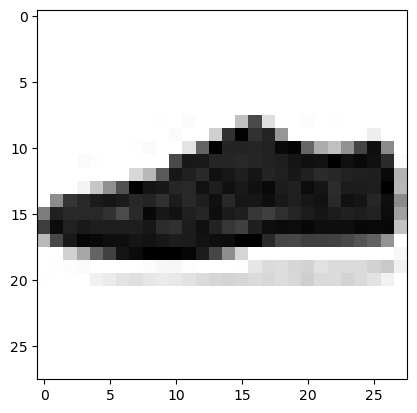

LABEL: 7
INPUT:


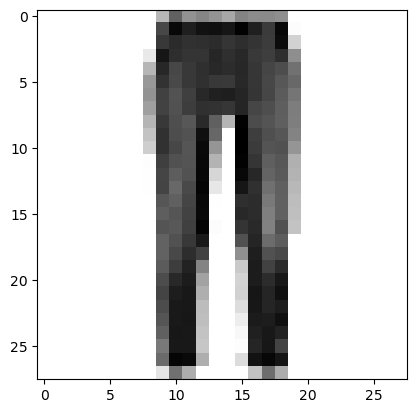

LABEL: 1
INPUT:


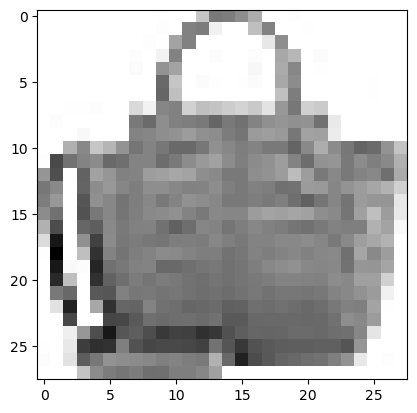

LABEL: 8


In [7]:
# let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

**TO DO A.2** Now **use a feed-forward Neural Network** for prediction. <br><br>
Use the **multi-layer perceptron** classifier, with the following parameters: <br>
`max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID` <br>
The `random_state` parameter ensures the run is the same even if you run it more than once, while the `alpha` parameter is the regularization term.<br>
You might get some **warnings about the convergence**, ignore them (or try to increase the max_iter parameter if you have a powerful computer). <br>

Then, using the default activation function, **pick four or five architectures** to consider, with different numbers of hidden layers and different sizes. <br>
It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. <br>
Evaluate the architectures you chose using **GridSearchCV with cv=5**. <br>

You can reduce the number of iterations if the running time is too long on your computer.

In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (25,), (50,), (100,), (25,10,), (50,10,), (50,25,), (50,25,10,), 
                                     (50,25,25,), (50,50,10,), (50,50,25,), (100,100,10,), (100,100,100,)]}

# hiiden layer e' una tupla e ogni elemento della tupla rappresenta un layer interno, il numero associato a
# quell'elemento e' il numero di neuroni che voglio in quel layer
# Per esempio: (10,15,5,) mi permette di costruire una rete neurale composta da 3layer interni. Ovvero avro':
# layer 0 = numeri di neuroni ugiale al numero di features negli vettori di input
# layer 1 (primo layer nascosto) = (corrispondente al primo elemento della tupla) e' composto da 10 neuroni  
# layer 2 (secondo layer nascosto) = (corrispondente al secondo elemento della tupla) e' composto da 15 neuroni  
# layer 3 (terzo layer nascosto) = (corrispondente al terzo elemento della tupla) e' composto da 5 neuroni  
# layer 4 = l'ultimo layer (quello di output) e' definito dalproblema che sto cercando di risolvere



mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
mlp_arch_CV = GridSearchCV(mlp, parameters, cv=5)
mlp_arch_CV.fit(X_train, y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found:", mlp_arch_CV.best_params_, "\n\n")
print("Score with best parameters:", mlp_arch_CV.best_score_, "\n\n")

results = DataFrame(mlp_arch_CV.cv_results_)
print("All scores on the grid:\n")
results[['param_hidden_layer_sizes', 'mean_test_score']]

RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (100,)} 


Score with best parameters: 0.7360000000000001 


All scores on the grid:



,param_hidden_layer_sizes,mean_test_score
0,"(10,)",0.722
1,"(25,)",0.722
2,"(50,)",0.734
3,"(100,)",0.736
4,"(25, 10)",0.506
5,"(50, 10)",0.562
6,"(50, 25)",0.722
7,"(50, 25, 10)",0.482
8,"(50, 25, 25)",0.570
9,"(50, 50, 10)",0.588


**TO DO A.3** Now **try different batch sizes**, while keeping the **best NN** architecture you have found above. <br>
Remember that the batch size was previously set to the default value, i.e., `min(200, n_samples)`. <br>

Recall that a **batch size of 1 corresponds to baseline SGD**, while using all the **400 training samples** (there are 500 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to **standard GD** and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 30, 100, 400]}


# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5, shuffle=False, random_state=None)
# suggestion: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html



best_hidden_layer_sizes = (100,)
mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID,
                    hidden_layer_sizes=(100,))

# recall to use cv=kf to use the k-fold subdivision seen in the lectures
mlp_batch_CV = GridSearchCV(mlp, parameters, cv=kf)
mlp_batch_CV.fit(X_train, y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found:", mlp_batch_CV.best_params_, "\n\n")
print("Score with best parameters:", mlp_batch_CV.best_score_, "\n\n")

results = DataFrame(mlp_batch_CV.cv_results_)
print("All scores on the grid:\n")
results[['param_batch_size', 'mean_test_score']]

RESULTS FOR NN

Best parameters set found: {'batch_size': 400} 


Score with best parameters: 0.7220000000000001 


All scores on the grid:



,param_batch_size,mean_test_score
0,1,0.084
1,30,0.694
2,100,0.722
3,400,0.722


**TO DO A.Q1**

- What do you observe for different architectures and batch sizes? <br>
- How do the number of layers and their sizes affect the performances? <br>
- What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

<div class="alert alert-block alert-info">
Architetture differenti: <br>
    All'aumentare della grandezza dell'architettura (numero di layer interni e di neuroni per ogni layer) equivale un aumento di complessita' e di capacita' di adattamento dell'algoritmo rispetto al problema che gli viene assegnato. In linea di principio quindi mi dovrei aspettare che siano proprio le strutture piu' complesse ad ottenere lo score piu' alto. In realta' pero', come gia' visto in casi precedenti, architetture troppo complesse, in particolare in presena di piccoli training set, possono portare a situazioni di overfitting. Questo e' prorpio cio' che succede in questo caso in cui gia' con due layer interni l'architettura conduce ad una sitatuazione di overfitting. <br>

Differenti batch sizes: <br>
    E' possibile notare come per batch size troppo piccoli l'algoritmo non risulti stabile (l' ottimizzazione non riesce a seguire il "vero gradiente" e cio' non permette di raggiungere il minimo e quindi di ottimizzare i parametri) e per questo lo score ottenuto risulta basso. Confrontando batch size = 100 con il batch size = 400 (GD) e' possibile osservare che gia' con 100 samples l'algoritmo diventa molto piu' stabile riuscendo a seguire la giusta direzione del gradiente; infatti lo score calcolato con i parametri ottenuti usando un batch size = 100 o un batch size = 400 e' lo stesso.
    </div>

**TO DO A.4** Now **try** to use **different learning rates**, while keeping the **best NN architecture and batch size you have found above.** <br>
**Plot the learning curves** (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. <br>
You might get warnings about the convergence, this is expected. Ignore them.

/home/francesco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/francesco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/francesco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


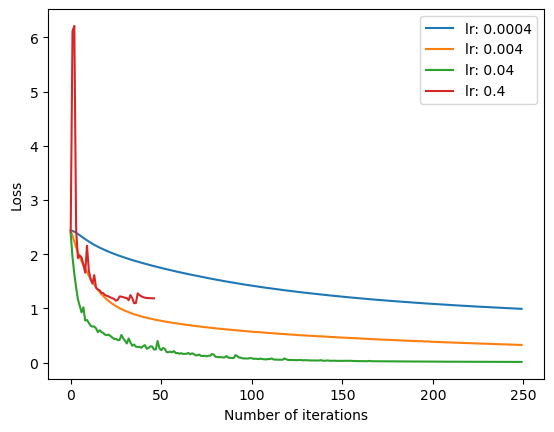

RESULTS FOR NN

Best parameters set found: 0.04
Score with best parameters: 1.0


In [10]:
lr_list = [4*10**exp for exp in range(-4,0)]
scores = {}
best_lr = 0
max_lr_score = 0

best_hidden_layer_sizes = (100,)
best_batch_size = 400

for lr in lr_list: 
    mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=lr, random_state=ID,
                    hidden_layer_sizes=best_hidden_layer_sizes, batch_size=best_batch_size)
    mlp.fit(X_train, y_train)
    scores[lr] = mlp.score(X_train, y_train, sample_weight=None)
    plt.plot(mlp.loss_curve_, label='lr: ' + str(lr))
    if scores[lr] > max_lr_score:
        max_lr_score = scores[lr]
        best_lr = lr

plt.legend(loc = 1)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()


print ('RESULTS FOR NN\n')
print("Best parameters set found:", best_lr)

print("Score with best parameters:", max_lr_score)


**Question A.Q2** Comment about the learning curves (i.e. the variation of the loss over the steps). <br>
How does the curve changes for different learning rates in terms of stability and speed of convergence ?

<div class="alert alert-block alert-info">
Con questo grafico risulata bene chiaro come il learning rates non debba essere ne' troppo piccolo ne' troppo grande. <br><br>
    Troppo piccolo (lr:0.0004)<br>
    la variazione dei parametri avviene troppo lentamente (algoritmo fin troppo stabile) e quindi per il raggiungimento del minimo servono troppe iterazioni. (Infatti la linea blu scende ma molto lentamente) <br><br>
    Troppo grande (lr:0.4)<br>
    l'algoritmo non e' stabile perche' un learning rate troppo grande "fa saltare" i parametri da un punto ad un altro non permettendo loro di raggiungere il minimo. Si puo' infatti osservare come la linea rossa non scenda in modo continuo bensi' ci sono molto punti in cui sale. <br><br>
    Via di mezzo (lr:0.04, 0,004) <br>
    variazioni abbastanza grandi in modo da riuscire a raggiungere un minimo in un numero ragionevole di iterazioni ed allo stesso non troppo grandi in modo da avere comunque un algoritmo stabile. <br>
    (lr: 0.004) = tra i due utilizza "passi" piu' piccoli e questo si puo' riscontrare dal fatto che la sua linea e' piu' "liscia". <br>
    (lr: 0.04) = i questo caso l'algorimto e' un po' piu' instabile (presenza diqualche picco) pero' riesce comunue a raggiungere un minimo. <br>
    Tra i due il paramtro migliore e' (lr = 0.04) in quanto a parita' di numero di iterazioni riesce ad ottenere un loss piu' basso.
    </div>

**TO DO A.5** Now get **training and test error** for a NN with best parameters (architecture, batch size and learning rate)from above. Plot the learning curve also for this case. <br>
As before, you might get a convergence warning, you can safely ignore it.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.214101


/home/francesco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


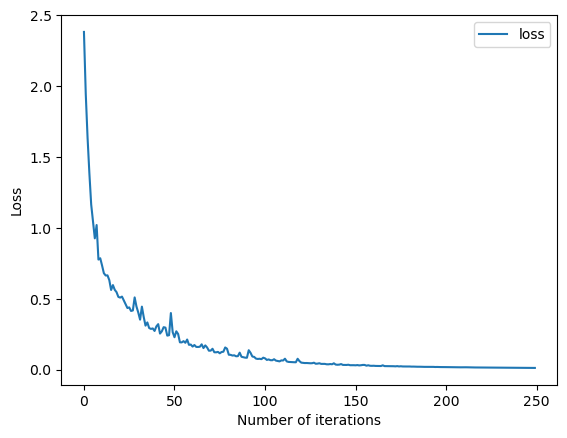

In [11]:
#get training and test error for the best NN model from CV
mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=0.04, random_state=ID,
                    hidden_layer_sizes=best_hidden_layer_sizes, batch_size=best_batch_size)
mlp.fit(X_train, y_train)

training_error = 1-mlp.score(X_train, y_train, sample_weight=None)
test_error = 1-mlp.score(X_test, y_test, sample_weight=None)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp.loss_curve_, label="loss")
plt.legend(loc = 1)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()

## B) More data 
Now let's do the same but **using 20000** (or less if it takes too long on your machine) **data points for training**. <br>
Make sure you are **consistent with the choice of `m_training`** in this and the later cells. <br>
Use the **same NN architecture** as before, but you can try more if you like and have a powerful computer!!

In [12]:
X = X[permutation]
y = y[permutation]

m_training = 20000

X_train, X_test = X[0:m_training], X[m_training:]
y_train, y_test = y[0:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [2023 1963 1983 1987 2038 2025 2008 1987 1990 1996]


**TO DO B.1** Train the NNs with the added data points using the optimum parameters found above. <br>
Eventually, feel free to try different architectures if you like. <br>
We suggest that you use `verbose=True` so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50). <br>
This is just for debug purposes, **remember to switch it off** once you found a setup you like. <br>
As before, you might get a convergence warning (especially if you reduced the number of iterations), you can safely ignore it.

In [13]:
mlp_large = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=0.04, random_state=ID,
                    hidden_layer_sizes=best_hidden_layer_sizes, batch_size=best_batch_size)
mlp_large.fit(X_train, y_train)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN
training_error = 1-mlp_large.score(X_train, y_train, sample_weight=None)
test_error = 1-mlp_large.score(X_test, y_test, sample_weight=None)
print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


RESULTS FOR NN

NN training error: 0.000000
NN test error: 0.128225


/home/francesco/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


**Question B.Q1** Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Comment about the results you obtained.

<div class="alert alert-block alert-info">
In entrambi i casi il trainin error e' pari a zero. Nel caso in ui utilizzo un training set di dimensione 20000 pero' ottengo un test error molto inferiore poiche' passo dal 0.24, nel caso in cui ho utilizzato 500 samples come training set, a 0.12 nel caso in cui ne ho usato 20000. In entrambi i casi la differenza di valore tra il test e il trainig error mi fa supporre di essere in un caso di overfitting. Di consegunza nel secondo caso la situazione migliora poiche', avendo dato all'algoritmo un trining test molto piu' ampio, la possibilita', o in ogni caso la presenza, di overfitting diminuisce.
    </div>

**TO DO B.2** Plot an example that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=20000 training data points.

INPUT:


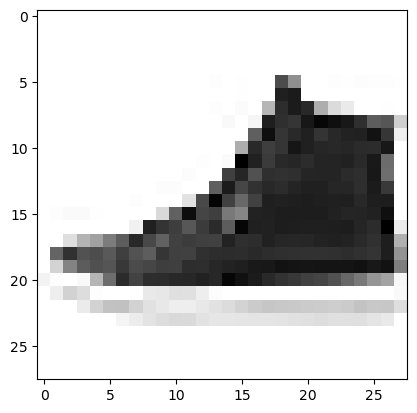

LABEL: 7
NN prediction for m=500: 9
NN prediction for m=20000: 7


In [14]:
NN_prediction = mlp.predict(X_test)
large_NN_prediction = mlp_large.predict(X_test)

for i, (p, pl, l) in enumerate(zip(NN_prediction, large_NN_prediction, y_test)):
    if p != l and pl == l:
        plot_input(X_test, y_test, i)
        print("NN prediction for m=500:", p)
        print("NN prediction for m=20000:", pl)
        break

**TO DO B.3** Plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 20000 data points. <br>
Note that the code is provided, you just need to change the `mlp` variable name to the one used before - if you changed it.  

Weights with 500 data points:


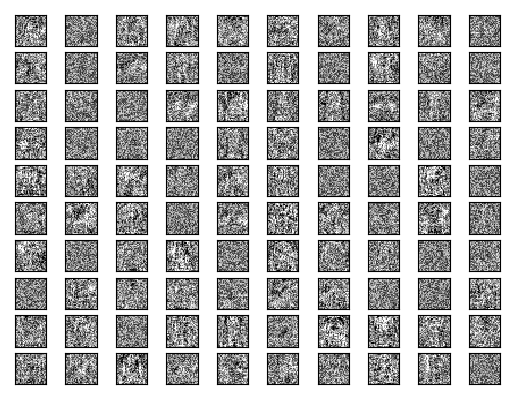

Weights with 20000 data points:


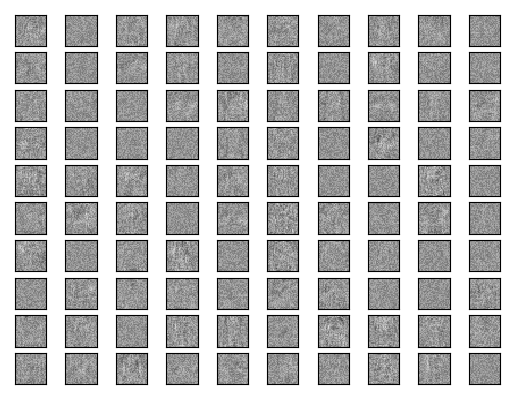

In [15]:
print("Weights with 500 data points:")
fig, axes = plt.subplots(10, 10)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 20000 data points:")
fig, axes = plt.subplots(10, 10)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

**Question B.Q2** Describe what do you observe by looking at the weights

<div class="alert alert-block alert-info">
L' architettura migliore in questo caso e' risultata essere quella con un solo layer interno composto da 100 neuroni, di conseguenza l' architettura complessiva puo' essere descritta come (784,100,10) in cui il primo e l'ultimo numero rappresentano rispettivamente il layer di input e quello di output. In tale conformazione ogni neurone nel layer interno avra' 784 weights corrispondenti ai collegamenti tra esso e tutti i neuroni nel layer di input. Ognuna di queste immagini rappresenta i vari collegamenti tra i singoli neuroni, del layer di mezzo, con i neuroni del layer di input. <br>
    In particolare l'immagine i-esima e' composta da 784 pixels; ogni pixel, attraverso un codice colore, rappresena il valore del weights tra il rispettivo neurone di input e l'i-esimo neurone del layer interno. Nello specifico piu' scuro e' il pixel e minore e' il valore di quel weights. <br>
    E' possibile osservare come nel caso del training set pari a 500 i neuroni del layer interno tendano ad utilizzare in modo differente le informazioni derivanti dai neuroni di input, in particolare essi utilizzano solo alcuni pizex (i pixel neri rappresentano quelli non utilizzati). 
    Nel caso del training set da 20000 samples e' possibile osservare una maggiore unifromita' nell'uso dei pixel delle immagini. 
    </div>

**TO DO B.4** Create a SVM classifier with the following parameters: `kernel='rbf', C=10, gamma=0.01`. <br>
Fit it on a few data points and compute its training and test scores.

In [16]:
m_training = 500

X_train, X_test = X[0:m_training], X[m_training:]
y_train, y_test = y[0:m_training], y[m_training:]

# best parameters found in the SVM notebook
SVM = SVC(kernel="rbf", C=10, gamma=0.01, decision_function_shape="ovo")
SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM')
SVM_training_error = SVM.score(X_train, y_train, sample_weight=None)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = SVM.score(X_test, y_test, sample_weight=None)
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.998
Test score SVM:
0.803798319327731


In [17]:
m_training = 20000

X_train, X_test = X[0:m_training], X[m_training:]
y_train, y_test = y[0:m_training], y[m_training:]

# best parameters found in the SVM notebook
SVM = SVC(kernel="rbf", C=10, gamma=0.01, decision_function_shape="ovo")
SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM')
SVM_training_error = SVM.score(X_train, y_train, sample_weight=None)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = SVM.score(X_test, y_test, sample_weight=None)
print("Test score SVM:")
print(SVM_test_error)


RESULTS FOR SVM
Training score SVM:
0.9784
Test score SVM:
0.890375


**Question B.Q3** Compare the results of SVM and of NN. Which one achieves the best performances? 

<div class="alert alert-block alert-info">
For training set = 500 <br>
SVM <br>
    training error = 0.002 <br>
    test error = 0.196 <br>
NN <br>
    trining error = 0 <br>
    test error = 0.214 <br>
<br>
For training set = 20000 <br>
SVM <br>
    training error = 0.022 <br>
    test error = 0.110 <br>
NN <br> 
    trining error = 0 <br>
    test error = 0.128 <br>
    
E' possibile osservare come, sia per 500 che per 20000 training samples, il metodo SVM supera, anche se di poco, risultati migliori (migliore test error) rispetto alla rete neurale. In oltre si nota come in generale i NN hanno una maggiore probabilita' di overfitting.
    </div>